# Taller 2 - Ciencia de datos aplicada

MINE-4101: Applied Data Science Taller 1  
Universidad de los Andes  
  
**Dataset:** apartamentos.ccsv

**Integrantes**

  - Cristian René Méndez G  cod: 200420475
   
Last update: Nov, 2025      
*Notebook auto-contenido que implementa todos los requisitos del taller.

**Objetivo:** evaluar las capacidades del estudiante para aplicar técnicas de machine learning, las
cuales permita descubrir insights, sugerir accionables al negocio y calcular el valor ganado

HabitAlpes es una startup Colombiana que está armando un portafolio de servicios de consultoría para los propietarios de vivienda y para el gobierno distrital. Entre sus diferentes proyectos se encuentran el soporte para avalúo de los precios de vivienda, la compra, remodelación y reventa de propiedades en la capital del país, consultoría y elaboración de contratos de arrendamiento, correcciones de avalúos catastrales e informes de sugerencia de reclasificación de estratos en barrios de diferentes localidades de la ciudad. Adicionalmente, la empresa busca ser efectiva al momento de ofrecer a sus clientes el portafolios de servicios más conveniente según sus necesidades.


Es por esto por lo que HabitAlpes le ha contratado para que, usando herramientas de Machine Learning e Inteligencia de Negocios, usted participe en la implementación de uno de sus servicios. En particular, HabitAlpes quiere comenzar con la construcción de una herramienta de cálculo de precio de **venta para apartamentos** de la ciudad, de tal manera que sus clientes puedan ingresar la información de sus respectivos apartamentos y obtener un valor estimado sugerido que esté de acuerdo con las características y ubicación de este, y en línea con los precios de venta de propiedades similares en el sector que le permitan ser competitivos. Para comenzar, la empresa ha recopilado una muestra de la información de apartamentos en el mercado de los últimos dos meses, que servirá como su insumo para la construcción de una prueba de concepto de la herramienta.


Adicionalmente, usted sabe que el proceso de compra requiere la inversión de 6 horas de un perito (salario por hora: $9.500) que revise los datos y genere un precio. Con un algoritmo de Machine Learning capaz de estimar de forma precisa los montos, se estima que se reducirá el tiempo del experto a 1 hora únicamente. HabitAlpes es capaz de revisar hasta 500 apartamentos al mes. Según datos históricos, se prevé que, por cada estimación por debajo de 20 millones del valor del apartamento, el cliente solicitará un avalúo presencial, mientras que las estimaciones que sobreestiman el valor no son reportadas.

##  1.Entendimiento y preparación de los datos:

### 1.1 importar y configurar librerias

In [1]:
# --- Carga de datos, librerías principales y preprocesamiento ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### 1.2 Cargue del set de datos

In [2]:
# Obtención del dataset
df = pd.read_csv('apartamentos.csv')

### 1.3 Entendimiento inicial de los datos

In [3]:
# Eliminamos filas vacias
df = df.dropna(how='all')

In [4]:
# Inspección básica de las columnas

print("Dimensiones del dataset: ",df.shape)
print("Nombre de variables: ", df.columns)

Dimensiones del dataset:  (43013, 46)
Nombre de variables:  Index(['_id', 'codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'area', 'habitaciones', 'banos', 'administracion', 'parqueaderos',
       'sector', 'estrato', 'antiguedad', 'latitud', 'longitud', 'direccion',
       'descripcion', 'website', 'last_view', 'datetime', 'url', 'timeline',
       'estado', 'compañia', 'precio_arriendo', 'jacuzzi', 'piso', 'closets',
       'chimenea', 'permite_mascotas', 'gimnasio', 'ascensor',
       'conjunto_cerrado', 'piscina', 'salon_comunal', 'terraza', 'vigilancia',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm', 'parque_cercano',
       'distancia_parque_m', 'is_cerca_parque'],
      dtype='object')


In [5]:
#Inspeccion de cantidad de datos unicos y tipo de dato
for i in df.columns:
  print( "Cantidad de datos únicos para",i,": ",len(df[i].unique()), ", -Tipo de dato:", df[i].dtype)



Cantidad de datos únicos para _id :  43013 , -Tipo de dato: object
Cantidad de datos únicos para codigo :  43013 , -Tipo de dato: object
Cantidad de datos únicos para tipo_propiedad :  3 , -Tipo de dato: object
Cantidad de datos únicos para tipo_operacion :  3 , -Tipo de dato: object
Cantidad de datos únicos para precio_venta :  2809 , -Tipo de dato: float64
Cantidad de datos únicos para area :  4494 , -Tipo de dato: float64
Cantidad de datos únicos para habitaciones :  8 , -Tipo de dato: float64
Cantidad de datos únicos para banos :  8 , -Tipo de dato: float64
Cantidad de datos únicos para administracion :  4801 , -Tipo de dato: float64
Cantidad de datos únicos para parqueaderos :  10 , -Tipo de dato: float64
Cantidad de datos únicos para sector :  104 , -Tipo de dato: object
Cantidad de datos únicos para estrato :  8 , -Tipo de dato: float64
Cantidad de datos únicos para antiguedad :  9 , -Tipo de dato: object
Cantidad de datos únicos para latitud :  23274 , -Tipo de dato: float64
Ca

In [6]:
# Analisis para variables que tienen menos de 10 valores unicos.
for i in df.columns:
  if (len(df[i].unique()) <=10):
    print( "Cantidad de datos únicos para",i,":",len(df[i].unique()), ", -data:", df[i].unique())

Cantidad de datos únicos para tipo_propiedad : 3 , -data: ['APARTAMENTO' 'CASA CON CONJUNTO CERRADO' 'CASA']
Cantidad de datos únicos para tipo_operacion : 3 , -data: ['VENTA' 'VENTA Y ARRIENDO' 'ARRIENDO']
Cantidad de datos únicos para habitaciones : 8 , -data: [ 3.  2.  1.  4.  6.  7.  5. nan]
Cantidad de datos únicos para banos : 8 , -data: [ 2.  1.  4.  3.  6.  0.  5. nan]
Cantidad de datos únicos para parqueaderos : 10 , -data: [ 1.  0.  2. -2.  3.  4. nan 10. 20. 30.]
Cantidad de datos únicos para estrato : 8 , -data: [ 3.  2.  4.  5.  1.  6. nan  0.]
Cantidad de datos únicos para antiguedad : 9 , -data: ['ENTRE 10 Y 20 ANOS' 'MAS DE 20 ANOS' 'ENTRE 0 Y 5 ANOS'
 'ENTRE 5 Y 10 ANOS' 'REMODELADO' 'PARA ESTRENAR' 'SOBRE PLANOS'
 'EN CONSTRUCCION' nan]
Cantidad de datos únicos para website : 3 , -data: ['habi.co' 'metrocuadrado.com' nan]
Cantidad de datos únicos para estado : 3 , -data: [nan 'USADO' 'NUEVO']
Cantidad de datos únicos para jacuzzi : 3 , -data: [ 0.  1. nan]
Cantidad de

In [7]:
# Filtramos por tipo de propiedad y por tipo de operacion

def filtrar_datos_operacion_venta (df):
  df = df.loc[df["tipo_propiedad"]=="APARTAMENTO"]
  df = df.loc[df["tipo_operacion"]=="VENTA"]
  return df

data_aptos = filtrar_datos_operacion_venta(df)
data_aptos.shape

(27200, 46)

In [8]:
# Datos unicos para variables que tienen menos de 10 valores.
for i in data_aptos.columns:
  if (len(data_aptos[i].unique()) <=10):
    print( "Cantidad de datos únicos para",i,":",len(data_aptos[i].unique()), ", -data:", data_aptos[i].unique())

Cantidad de datos únicos para tipo_propiedad : 1 , -data: ['APARTAMENTO']
Cantidad de datos únicos para tipo_operacion : 1 , -data: ['VENTA']
Cantidad de datos únicos para habitaciones : 6 , -data: [3. 2. 1. 4. 7. 5.]
Cantidad de datos únicos para banos : 7 , -data: [2. 1. 3. 6. 4. 0. 5.]
Cantidad de datos únicos para parqueaderos : 7 , -data: [ 1.  0.  2. -2.  3.  4. 30.]
Cantidad de datos únicos para estrato : 8 , -data: [ 3.  2.  4.  5.  1.  6. nan  0.]
Cantidad de datos únicos para antiguedad : 9 , -data: ['ENTRE 10 Y 20 ANOS' 'MAS DE 20 ANOS' 'ENTRE 0 Y 5 ANOS'
 'ENTRE 5 Y 10 ANOS' 'REMODELADO' 'PARA ESTRENAR' 'SOBRE PLANOS'
 'EN CONSTRUCCION' nan]
Cantidad de datos únicos para website : 3 , -data: ['habi.co' 'metrocuadrado.com' nan]
Cantidad de datos únicos para estado : 3 , -data: [nan 'USADO' 'NUEVO']
Cantidad de datos únicos para jacuzzi : 3 , -data: [ 0.  1. nan]
Cantidad de datos únicos para piso : 1 , -data: [nan]
Cantidad de datos únicos para closets : 1 , -data: [nan]
Can

Columnas a eliminar de acuerdo a la validacion, no son relevantes para la generacion del modelo



*   Piso
*   Closets
*   Chimenea
*   permite_mascotas
*   salon_comunal




In [9]:
# Analisis para variables que tienen mas de 10 valores unicos.
for i in data_aptos.columns:
  if (len(data_aptos[i].unique()) >10):
    print( "Cantidad de datos únicos para",i,":",len(data_aptos[i].unique()),",-Tipo de dato:", data_aptos[i].dtype)

Cantidad de datos únicos para _id : 27200 ,-Tipo de dato: object
Cantidad de datos únicos para codigo : 27200 ,-Tipo de dato: object
Cantidad de datos únicos para precio_venta : 2748 ,-Tipo de dato: float64
Cantidad de datos únicos para area : 3839 ,-Tipo de dato: float64
Cantidad de datos únicos para administracion : 3951 ,-Tipo de dato: float64
Cantidad de datos únicos para sector : 102 ,-Tipo de dato: object
Cantidad de datos únicos para latitud : 16218 ,-Tipo de dato: float64
Cantidad de datos únicos para longitud : 9200 ,-Tipo de dato: float64
Cantidad de datos únicos para direccion : 635 ,-Tipo de dato: object
Cantidad de datos únicos para descripcion : 26011 ,-Tipo de dato: object
Cantidad de datos únicos para last_view : 27199 ,-Tipo de dato: object
Cantidad de datos únicos para datetime : 27199 ,-Tipo de dato: object
Cantidad de datos únicos para url : 725 ,-Tipo de dato: object
Cantidad de datos únicos para timeline : 948 ,-Tipo de dato: object
Cantidad de datos únicos para c

In [10]:
#Ejemplos de valores en cada columna
for i in data_aptos.columns:
  if (len(data_aptos[i].unique()) >10):
    print('--- Ejemplo de', i,': \n', data_aptos[i].head(3))

--- Ejemplo de _id : 
 0    66d86c7eceda690e85508760
1    66d86c7eceda690e85508761
2    66d86c7eceda690e85508762
Name: _id, dtype: object
--- Ejemplo de codigo : 
 0    4133491
1    3889852
2    4386770
Name: codigo, dtype: object
--- Ejemplo de precio_venta : 
 0    339000000.0
1    223000000.0
2    440898168.0
Name: precio_venta, dtype: float64
--- Ejemplo de area : 
 0    76.0
1    63.0
2    54.0
Name: area, dtype: float64
--- Ejemplo de administracion : 
 0    300000.0
1         NaN
2    305000.0
Name: administracion, dtype: float64
--- Ejemplo de sector : 
 0               BRITALIA
1    SAN CRISTOBAL NORTE
2              LA SABANA
Name: sector, dtype: object
--- Ejemplo de latitud : 
 0    4.746592
1    4.730111
2    4.607378
Name: latitud, dtype: float64
--- Ejemplo de longitud : 
 0   -74.057571
1   -74.028170
2   -74.082648
Name: longitud, dtype: float64
--- Ejemplo de direccion : 
 0     CARRERA 55A # 163-35
1    CARRERA 7F # 153 - 75
2      CARRERA 69C #2 - 60
Name: direccion

Columnas a eliminar de acuerdo a la validacion, no son relevantes para la generacion del modelo




* sector
* latitud
* longitud
* direccion
* descripcion
* last_view
* datetime
* url
* timeline
* compañia
* precio_arriendo
* localidad
* barrio
* estacion_tm_cercana
* parque_cercano



In [11]:
columnas=['_id', 'codigo',"piso","closets","chimenea","permite_mascotas",
          "salon_comunal",'website','sector','latitud','longitud','direccion',
          'descripcion','last_view','datetime','url','timeline','compañia',
          'precio_arriendo','localidad','barrio','estacion_tm_cercana',
          'parque_cercano','tipo_propiedad','coords_modified' ]

def eliminar_columnas(df, columnas):
    for columna in columnas:
        if columna in df.columns:
            df = df.drop(columna, axis=1)
            print(f"La columna '{columna}' ha sido eliminada del DataFrame.")
        else:
            print(f"La columna '{columna}' no existe en el DataFrame.")
    return df

data_clean = eliminar_columnas(data_aptos, columnas)
data_clean.shape

La columna '_id' ha sido eliminada del DataFrame.
La columna 'codigo' ha sido eliminada del DataFrame.
La columna 'piso' ha sido eliminada del DataFrame.
La columna 'closets' ha sido eliminada del DataFrame.
La columna 'chimenea' ha sido eliminada del DataFrame.
La columna 'permite_mascotas' ha sido eliminada del DataFrame.
La columna 'salon_comunal' ha sido eliminada del DataFrame.
La columna 'website' ha sido eliminada del DataFrame.
La columna 'sector' ha sido eliminada del DataFrame.
La columna 'latitud' ha sido eliminada del DataFrame.
La columna 'longitud' ha sido eliminada del DataFrame.
La columna 'direccion' ha sido eliminada del DataFrame.
La columna 'descripcion' ha sido eliminada del DataFrame.
La columna 'last_view' ha sido eliminada del DataFrame.
La columna 'datetime' ha sido eliminada del DataFrame.
La columna 'url' ha sido eliminada del DataFrame.
La columna 'timeline' ha sido eliminada del DataFrame.
La columna 'compañia' ha sido eliminada del DataFrame.
La columna 'p

(27200, 21)

Se tiene el siguiente dataframe con las columnas relevantes para construir el modelo

In [12]:
data_clean.describe()

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,estrato,jacuzzi,gimnasio,ascensor,conjunto_cerrado,piscina,terraza,vigilancia,distancia_estacion_tm_m,is_cerca_estacion_tm,distancia_parque_m,is_cerca_parque
count,2.720000e+04,27200.000000,27200.000000,27200.000000,2.481000e+04,27200.000000,27199.000000,27198.000000,27198.000000,27198.000000,27198.000000,27198.000000,27198.000000,27198.000000,27200.000000,27200.000000,27200.000000,27200.000000
mean,2.376872e+09,142.480480,2.744265,2.824890,5.061387e+06,1.755147,4.860142,0.051143,0.323038,0.652732,0.430546,0.104567,0.001250,0.598647,1282.677642,0.205257,817.709165,0.259412
std,5.613372e+10,235.392557,0.780029,1.162722,7.657462e+07,1.088855,1.215418,0.220294,0.467646,0.476111,0.495162,0.306000,0.035335,0.490181,843.683272,0.403897,442.660196,0.438320
min,1.000000e+06,0.000000,1.000000,0.000000,1.000000e+00,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.940000,0.000000,0.220000,0.000000
25%,4.050000e+08,69.000000,2.000000,2.000000,3.500000e+05,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,584.117500,0.000000,490.270000,0.000000
50%,7.000000e+08,110.000000,3.000000,3.000000,6.500000e+05,2.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1193.120000,0.000000,764.900000,0.000000
75%,1.300000e+09,180.000000,3.000000,4.000000,1.190000e+06,2.000000,6.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1729.882500,0.000000,1091.497500,1.000000
max,4.250000e+12,19621.000000,7.000000,6.000000,3.500000e+09,30.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7095.660000,1.000000,5996.900000,1.000000


### 1.4 Analisis univariado.

In [13]:
#contar cantidad de NAN por cada variable
columnas_imputar_moda=[]

for i in data_clean.columns:
  if data_clean[i].isna().sum()>0:
    porcentaje=(data_clean[i].isna().sum()/len(data_clean))
    print('Cantidad de nan para',i,':',data_clean[i].isna().sum(),', -porcentaje:', f'{porcentaje:.2%}')
    if porcentaje < 0.02:
      columnas_imputar_moda.append(i)

print(columnas_imputar_moda)

Cantidad de nan para administracion : 2390 , -porcentaje: 8.79%
Cantidad de nan para estrato : 1 , -porcentaje: 0.00%
Cantidad de nan para antiguedad : 9 , -porcentaje: 0.03%
Cantidad de nan para estado : 726 , -porcentaje: 2.67%
Cantidad de nan para jacuzzi : 2 , -porcentaje: 0.01%
Cantidad de nan para gimnasio : 2 , -porcentaje: 0.01%
Cantidad de nan para ascensor : 2 , -porcentaje: 0.01%
Cantidad de nan para conjunto_cerrado : 2 , -porcentaje: 0.01%
Cantidad de nan para piscina : 2 , -porcentaje: 0.01%
Cantidad de nan para terraza : 2 , -porcentaje: 0.01%
Cantidad de nan para vigilancia : 2 , -porcentaje: 0.01%
['estrato', 'antiguedad', 'jacuzzi', 'gimnasio', 'ascensor', 'conjunto_cerrado', 'piscina', 'terraza', 'vigilancia']


Al tener poca representacion, los datos co un porcentaje bajo se les imputa mediana o moda para no afectar el dato

In [14]:
def imputar_moda(df, columnas):
    for columna in columnas:
      print(columna)
      moda=df[columna].mode()[0]
      print(moda)
      df[columna]=df[columna].fillna(moda)

imputar_moda(data_clean, columnas_imputar_moda)

estrato
6.0
antiguedad
MAS DE 20 ANOS
jacuzzi
0.0
gimnasio
0.0
ascensor
1.0
conjunto_cerrado
0.0
piscina
0.0
terraza
0.0
vigilancia
1.0


In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27200 entries, 0 to 43012
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tipo_operacion           27200 non-null  object 
 1   precio_venta             27200 non-null  float64
 2   area                     27200 non-null  float64
 3   habitaciones             27200 non-null  float64
 4   banos                    27200 non-null  float64
 5   administracion           24810 non-null  float64
 6   parqueaderos             27200 non-null  float64
 7   estrato                  27200 non-null  float64
 8   antiguedad               27200 non-null  object 
 9   estado                   26474 non-null  object 
 10  jacuzzi                  27200 non-null  float64
 11  gimnasio                 27200 non-null  float64
 12  ascensor                 27200 non-null  float64
 13  conjunto_cerrado         27200 non-null  float64
 14  piscina                  27

In [16]:
for i in data_clean.columns:
  if data_clean[i].isna().sum()>0:
    porcentaje=(data_clean[i].isna().sum()/len(data_clean))
    print('Cantidad de nan para',i,':',data_clean[i].isna().sum(),', -porcentaje:', f'{porcentaje:.2%}')

Cantidad de nan para administracion : 2390 , -porcentaje: 8.79%
Cantidad de nan para estado : 726 , -porcentaje: 2.67%


In [17]:
#Validacion columna estado para determinar la forma de imputar los NAN
estado_antiguedad=data_clean.groupby(['estado','antiguedad'],dropna=False)['estado'].count()
print(estado_antiguedad)

estado  antiguedad        
NUEVO   EN CONSTRUCCION        101
        PARA ESTRENAR           18
        SOBRE PLANOS           107
USADO   ENTRE 0 Y 5 ANOS      4415
        ENTRE 10 Y 20 ANOS    7117
        ENTRE 5 Y 10 ANOS     4213
        MAS DE 20 ANOS        9545
        REMODELADO             958
NaN     ENTRE 0 Y 5 ANOS         0
        ENTRE 10 Y 20 ANOS       0
        ENTRE 5 Y 10 ANOS        0
        MAS DE 20 ANOS           0
Name: estado, dtype: int64


In [18]:
data_clean = eliminar_columnas(data_clean, ['estado', 'tipo_operacion'])
data_clean.shape

La columna 'estado' ha sido eliminada del DataFrame.
La columna 'tipo_operacion' ha sido eliminada del DataFrame.


(27200, 19)

Se determina que hay una alta correlacion entre el estado y la antiguedad, se elimina la columna estado para no aumentar la complejidad del modelo.

In [19]:
#Validacion de la columna administracion para determinar la forma de imputar los nan
administracion_antiguedad=data_clean.groupby(['antiguedad','administracion'],dropna=False)['administracion'].count()
print(administracion_antiguedad)



antiguedad        administracion
EN CONSTRUCCION   NaN               0
ENTRE 0 Y 5 ANOS  1.0               2
                  10.0              2
                  33.0              3
                  150.0             1
                                   ..
REMODELADO        4500000.0         1
                  5100000.0         1
                  6000000.0         1
                  NaN               0
SOBRE PLANOS      NaN               0
Name: administracion, Length: 7001, dtype: int64


Para los nan de apartamentos que estan en construccion y sobre planos se asume una administracion de 0 pesos.

In [20]:
print (data_clean[(data_clean['antiguedad'] == 'SOBRE PLANOS') & (data_clean['administracion'].isnull())].shape)
print (data_clean[(data_clean['antiguedad'] == 'EN CONSTRUCCION') & (data_clean['administracion'].isnull())].shape)

(107, 19)
(101, 19)


In [21]:
# imputar valores en 0 para la columna administracion en base a la columna antiguedad

mask= (data_clean['antiguedad'] == 'SOBRE PLANOS') & (data_clean['administracion'].isnull())
data_clean.loc[mask, 'administracion'] = 0

mask= (data_clean['antiguedad'] == 'EN CONSTRUCCION') & (data_clean['administracion'].isnull())
data_clean.loc[mask, 'administracion'] = 0

print (data_clean[(data_clean['antiguedad'] == 'SOBRE PLANOS') & (data_clean['administracion'].isnull())].shape)
print (data_clean[(data_clean['antiguedad'] == 'EN CONSTRUCCION') & (data_clean['administracion'].isnull())].shape)

(0, 19)
(0, 19)


In [22]:
#aplicar la media de los valores de administracion
data_clean['administracion'].fillna(data_clean['administracion'].mean(), inplace=True)

/tmp/ipython-input-812788274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean['administracion'].fillna(data_clean['administracion'].mean(), inplace=True)


In [23]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27200 entries, 0 to 43012
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   precio_venta             27200 non-null  float64
 1   area                     27200 non-null  float64
 2   habitaciones             27200 non-null  float64
 3   banos                    27200 non-null  float64
 4   administracion           27200 non-null  float64
 5   parqueaderos             27200 non-null  float64
 6   estrato                  27200 non-null  float64
 7   antiguedad               27200 non-null  object 
 8   jacuzzi                  27200 non-null  float64
 9   gimnasio                 27200 non-null  float64
 10  ascensor                 27200 non-null  float64
 11  conjunto_cerrado         27200 non-null  float64
 12  piscina                  27200 non-null  float64
 13  terraza                  27200 non-null  float64
 14  vigilancia               27

Ya no se tienen valores nulos y se tienen las variables con las que se va a modelar a traves de algoritmos de machine learning

In [24]:
data_clean.describe()

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,estrato,jacuzzi,gimnasio,ascensor,conjunto_cerrado,piscina,terraza,vigilancia,distancia_estacion_tm_m,is_cerca_estacion_tm,distancia_parque_m,is_cerca_parque
count,2.720000e+04,27200.000000,27200.000000,27200.000000,2.720000e+04,27200.000000,27200.000000,27200.000000,27200.000000,27200.000000,27200.000000,27200.000000,27200.000000,27200.000000,27200.000000,27200.000000,27200.000000,27200.000000
mean,2.376872e+09,142.480480,2.744265,2.824890,5.019307e+06,1.755147,4.860184,0.051140,0.323015,0.652757,0.430515,0.104559,0.001250,0.598676,1282.677642,0.205257,817.709165,0.259412
std,5.613372e+10,235.392557,0.780029,1.162722,7.313426e+07,1.088855,1.215415,0.220287,0.467637,0.476102,0.495157,0.305990,0.035334,0.490175,843.683272,0.403897,442.660196,0.438320
min,1.000000e+06,0.000000,1.000000,0.000000,0.000000e+00,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.940000,0.000000,0.220000,0.000000
25%,4.050000e+08,69.000000,2.000000,2.000000,3.617500e+05,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,584.117500,0.000000,490.270000,0.000000
50%,7.000000e+08,110.000000,3.000000,3.000000,7.200000e+05,2.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1193.120000,0.000000,764.900000,0.000000
75%,1.300000e+09,180.000000,3.000000,4.000000,1.396000e+06,2.000000,6.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1729.882500,0.000000,1091.497500,1.000000
max,4.250000e+12,19621.000000,7.000000,6.000000,3.500000e+09,30.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7095.660000,1.000000,5996.900000,1.000000


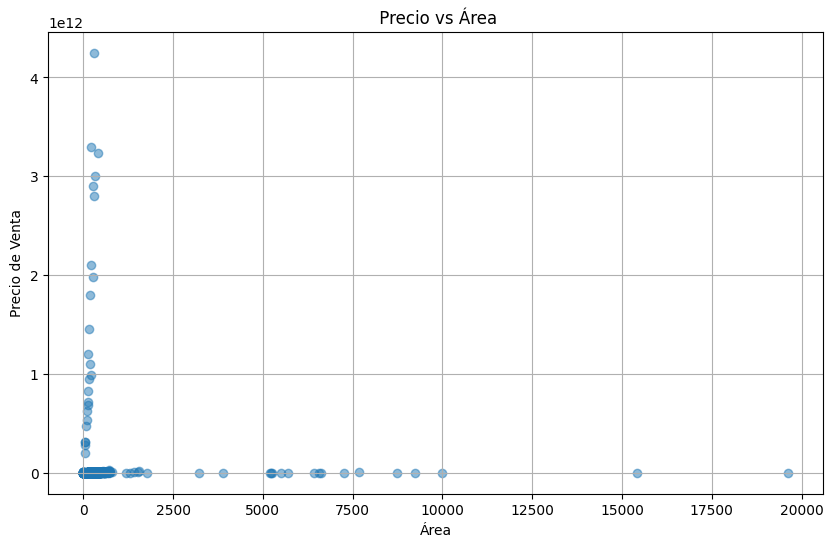

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(data_clean['area'], data_clean['precio_venta'], alpha=0.5)
plt.title(' Precio vs Área')
plt.xlabel('Área')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()


Se filtran los outliers encontrados y se delimita el valor de los aptos y las areas a trabajar

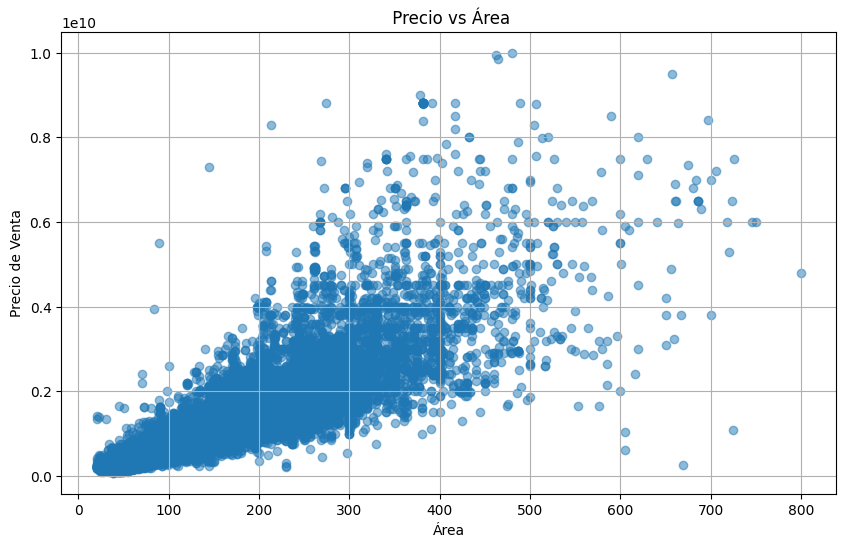

In [26]:
# se filtra area: entre 20 y 1000 m2 y precio: entre 50 millones y 10.000 millones
data_clean = data_clean[
    (data_clean['area'] >= 20) & (data_clean['area'] <= 1000) &
    (data_clean['precio_venta'] >= 50_000_000) & (data_clean['precio_venta'] <= 10_000_000_000)
].copy()

plt.figure(figsize=(10, 6))
plt.scatter(data_clean['area'], data_clean['precio_venta'], alpha=0.5)
plt.title(' Precio vs Área')
plt.xlabel('Área')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()


In [27]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27015 entries, 0 to 43012
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   precio_venta             27015 non-null  float64
 1   area                     27015 non-null  float64
 2   habitaciones             27015 non-null  float64
 3   banos                    27015 non-null  float64
 4   administracion           27015 non-null  float64
 5   parqueaderos             27015 non-null  float64
 6   estrato                  27015 non-null  float64
 7   antiguedad               27015 non-null  object 
 8   jacuzzi                  27015 non-null  float64
 9   gimnasio                 27015 non-null  float64
 10  ascensor                 27015 non-null  float64
 11  conjunto_cerrado         27015 non-null  float64
 12  piscina                  27015 non-null  float64
 13  terraza                  27015 non-null  float64
 14  vigilancia               27

## 2. División entrenamiento prueba validacion

In [28]:
# Separar Features (X) y Target (y)
target='precio_venta'
features=[col for col in data_clean.columns if col != target]

X = data_clean[features]
y = data_clean[target]

In [29]:
# Identificar columnas categóricas
categorical_cols = ['antiguedad']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)


In [30]:
# Separar Validación (20% del total)
X_rest, X_val, y_rest, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

# Train y Test ( 75% Train, 25% Test)
X_train, X_test, y_train, y_test = train_test_split(X_rest, y_rest, test_size=0.25, random_state=42)

print(f"Train: {X_train.shape} ")
print(f"Test:  {X_test.shape} ")
print(f"Val:   {X_val.shape}  ")


Train: (16209, 18) 
Test:  (5403, 18) 
Val:   (5403, 18)  


# 2.Entrenamiento del modelo de Machine Learning:

In [31]:
# --- ENTRENAMIENTO DE 3 MODELOS (SVM, RANDOM FOREST, DECISION TREE) ---
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np # Import numpy for sqrt

#Pipelines

# Support Vector Machine (Regresión)
pipeline_svr = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)), # with_mean=False por si hay matrices dispersas del OneHot
    ('regressor', SVR(C=1.0, epsilon=0.2)) # Hiperparámetros base
])

# Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# Decision Tree
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, random_state=42))
])


In [32]:

modelos = [
    ('SVR (Máquina de Soporte Vectorial)', pipeline_svr),
    ('Random Forest', pipeline_rf),
    ('Decision Tree', pipeline_dt)
]

resultados = {}

print("Iniciando entrenamiento de modelos")

for nombre, modelo in modelos:
    print(f"Entrenando {nombre}...")

    # Entrenar en conjunto de TRAIN
    modelo.fit(X_train, y_train)

    # Predecir en conjunto de TEST (Para selección)
    y_pred = modelo.predict(X_test)

    # Calcular Métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Corrected: Calculate MSE then take sqrt

    resultados[nombre] = mae
    print(f"   -> MAE: ${mae:,.0f} | RMSE: ${rmse:,.0f}\n")

# --- COMPARACIÓN FINAL ---
mejor_modelo_nombre = min(resultados, key=resultados.get)
print("========================================")
print(f"El mejor modelo según MAE en Test es: {mejor_modelo_nombre}")
print(f"Error Promedio: ${resultados[mejor_modelo_nombre]:,.0f}")
print("========================================")

# Guardamos el mejor pipeline en la variable 'best_model' para usarlo en los siguientes puntos
if mejor_modelo_nombre == 'Random Forest':
    best_model = pipeline_rf
elif mejor_modelo_nombre == 'Decision Tree':
    best_model = pipeline_dt
else:
    best_model = pipeline_svr

Iniciando entrenamiento de modelos
Entrenando SVR (Máquina de Soporte Vectorial)...
   -> MAE: $626,422,358 | RMSE: $1,072,874,840

Entrenando Random Forest...
   -> MAE: $170,302,379 | RMSE: $372,072,778

Entrenando Decision Tree...
   -> MAE: $201,994,731 | RMSE: $435,829,728

El mejor modelo según MAE en Test es: Random Forest
Error Promedio: $170,302,379


#3.Análisis cuantitativo de resultados del modelo:

In [33]:
# --- PUNTO 3: ANÁLISIS CUANTITATIVO (VALIDACIÓN) ---
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Generar predicciones finales
print("Generando predicciones en el conjunto de validación...")
y_pred_val = best_model.predict(X_val)

# 2. Calcular métricas clave
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2_val = r2_score(y_val, y_pred_val)

# Calcular MAPE (Mean Absolute Percentage Error) manualmente
# Evitamos división por cero sumando un epsilon si fuera necesario, pero en precios no suele pasar
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100

print("REPORTE DE DESEMPEÑO (VALIDACIÓN)")
print("=========================================")
print(f"MAE (Error Promedio en Pesos):  ${mae_val:,.0f} COP")
print(f"RMSE (Sensible a errores grandes): ${rmse_val:,.0f} COP")
print(f"MAPE (Error Promedio Porcentual): {mape_val:.2f}%")
print(f"R² (Varianza Explicada):          {r2_val:.4f}")


Generando predicciones en el conjunto de validación...
REPORTE DE DESEMPEÑO (VALIDACIÓN)
MAE (Error Promedio en Pesos):  $170,153,503 COP
RMSE (Sensible a errores grandes): $363,190,911 COP
MAPE (Error Promedio Porcentual): 15.04%
R² (Varianza Explicada):          0.8797


#4.Análisis cualitativo de resultados del modelo:

Importancia de Variables (SHAP) ---


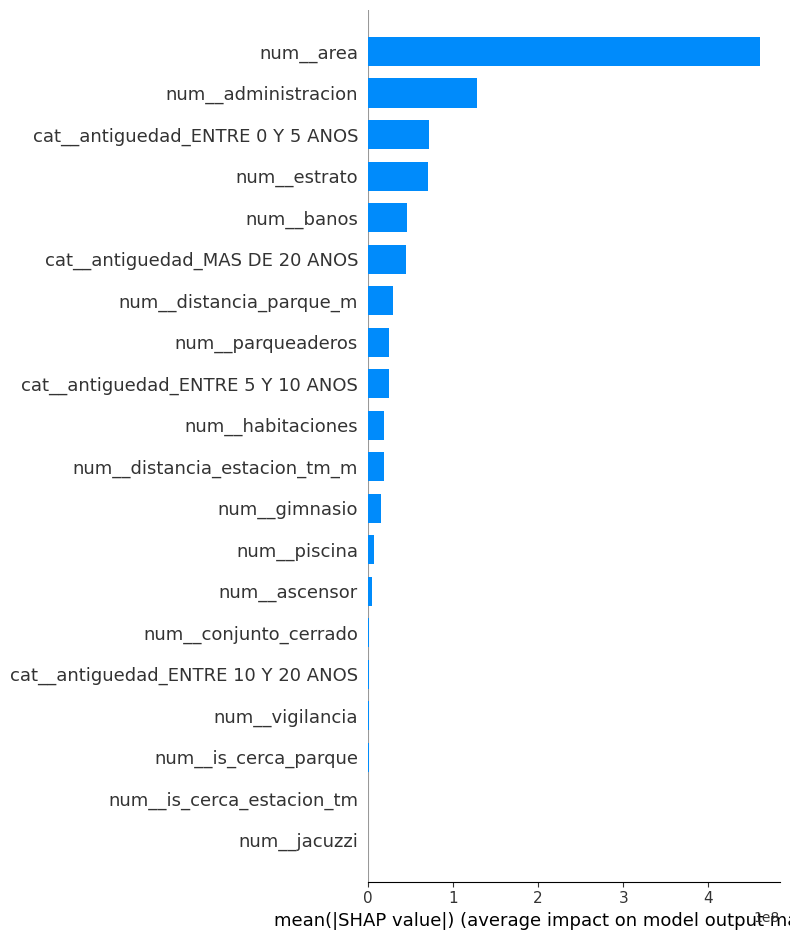

Impacto de Variables en las Predicciones (SHAP Summary) ---


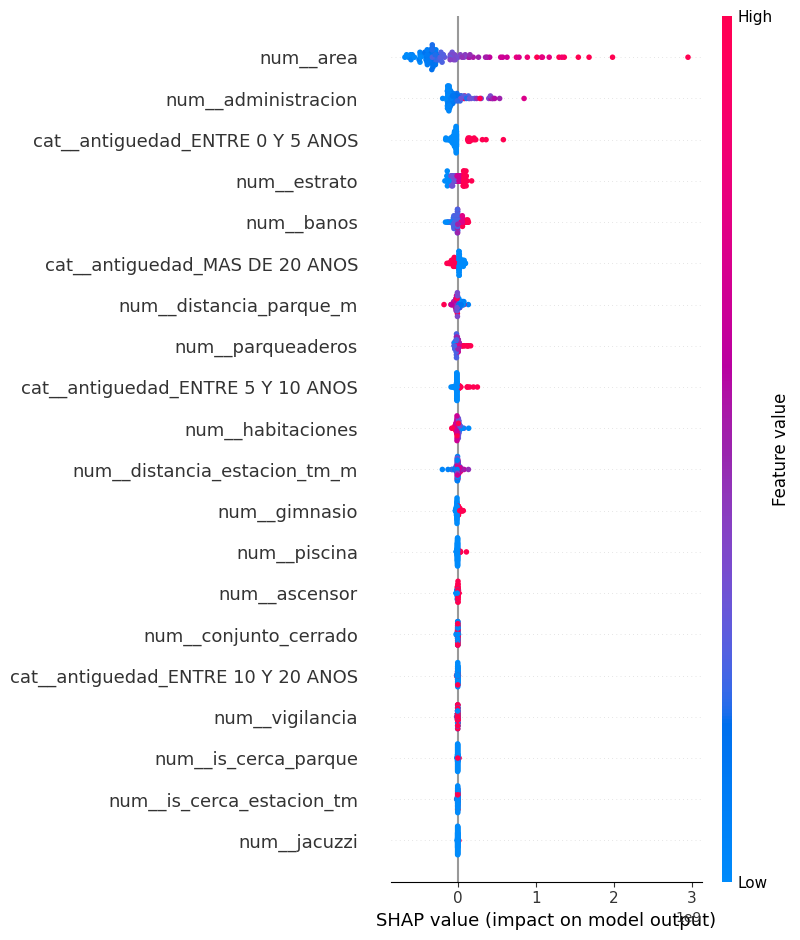

In [38]:
# --- ANÁLISIS CUALITATIVO (SHAP) ---
import shap
# Usamos una muestra del test set para agilizar el cálculo
X_shap = X_test.iloc[:100]

preprocessor = best_model.named_steps['preprocessor']
regressor = best_model.named_steps['regressor']

X_shap_transformed = preprocessor.transform(X_shap)

feature_names = preprocessor.get_feature_names_out()

X_shap_transformed_df = pd.DataFrame(X_shap_transformed, columns=feature_names)

# Inicializar Explainer
explainer = shap.TreeExplainer(regressor, data=X_shap_transformed_df)
shap_values = explainer.shap_values(X_shap_transformed_df)

print("Importancia de Variables (SHAP) ---")
shap.summary_plot(shap_values, X_shap_transformed_df, plot_type="bar")

print("Impacto de Variables en las Predicciones (SHAP Summary) ---")
shap.summary_plot(shap_values, X_shap_transformed_df)


# 5.Generación de valor:

In [44]:
# --- PARÁMETROS DEL NEGOCIO (Según Taller2.pdf) ---
COSTO_HORA_PERITO = 9500        # [cite: 21]
TIEMPO_MANUAL = 6               # Horas por apto (Proceso actual) [cite: 21]
TIEMPO_IA = 1                   # Horas por apto (Proceso nuevo) [cite: 22]
CAPACIDAD_MES = 500             # Aptos por mes [cite: 23]
COSTO_DESARROLLO = 35_000_000   # Supuesto de inversión inicial (CAPEX)

# Costos unitarios base
costo_proceso_manual = COSTO_HORA_PERITO * TIEMPO_MANUAL  # $57,000
costo_proceso_ia = COSTO_HORA_PERITO * TIEMPO_IA          # $9,500

# --- SIMULACIÓN DE ESCENARIOS ---
df_fin = pd.DataFrame({
    'Precio_Real': y_val,
    'Precio_Predicho': y_pred_val
})

# Cálculo del Error Monetario
df_fin['Error_Pesos'] = df_fin['Precio_Predicho'] - df_fin['Precio_Real']

# REGLA DE NEGOCIO[cite: 34]:
# "por cada estimación por debajo de 20 millones... el cliente solicitará un avalúo presencial"
# Significa: Si (Predicho - Real) < -20,000,000, fallamos.
df_fin['Fallo_Critico'] = df_fin['Error_Pesos'] < -20_000_000

# Cálculo de Costos Operativos Reales con el Modelo
def calcular_costo_operativo(fila):
    if fila['Fallo_Critico']:
        # ESCENARIO FALLO:
        # Pagamos la hora de IA ($9.500) + Toca hacer el avalúo manual completo ($57.000)
        # Costo total = $66.500 (o $57.000 si asumimos que el perito reemplaza la tarea)
        # Asumiremos el costo conservador: Costo IA + Costo Manual de corrección
        return costo_proceso_ia + costo_proceso_manual
    else:
        # ESCENARIO ÉXITO:
        # Solo pagamos la revisión rápida
        return costo_proceso_ia

df_fin['Costo_Final'] = df_fin.apply(calcular_costo_operativo, axis=1)

# --- RESULTADOS FINANCIEROS ---
tasa_fallos = df_fin['Fallo_Critico'].mean()
costo_promedio_nuevo = df_fin['Costo_Final'].mean()
ahorro_por_unidad = costo_proceso_manual - costo_promedio_nuevo
ganancia_mensual = ahorro_por_unidad * CAPACIDAD_MES
meses_retorno = COSTO_DESARROLLO / ganancia_mensual if ganancia_mensual > 0 else 999

print("ANÁLISIS DE VIABILIDAD FINANCIERA")
print("====================================")
print(f"1. Costo Actual (100% Manual):      ${costo_proceso_manual:,.0f} / apto")
print(f"2. Costo Nuevo (Modelo + Riesgo):   ${costo_promedio_nuevo:,.0f} / apto")
print(f"     Tasa de Reclamos (Fallos):     {tasa_fallos*100:.2f}%")
print(f"3. Ahorro Neto por Apartamento:     ${ahorro_por_unidad:,.0f}")
print("------------------------------------")
print(f"GANANCIA MENSUAL PROYECTADA:     ${ganancia_mensual:,.0f} (Base 500 aptos)")
print(f"PUNTO DE EQUILIBRIO (Break-even): {meses_retorno:.1f} meses")

ANÁLISIS DE VIABILIDAD FINANCIERA
1. Costo Actual (100% Manual):      $57,000 / apto
2. Costo Nuevo (Modelo + Riesgo):   $29,861 / apto
     Tasa de Reclamos (Fallos):     35.72%
3. Ahorro Neto por Apartamento:     $27,139
------------------------------------
GANANCIA MENSUAL PROYECTADA:     $13,569,545 (Base 500 aptos)
PUNTO DE EQUILIBRIO (Break-even): 2.6 meses


# 6.Insights, conclusiones y recomendaciones

**Desempeno del Modelo**

El modelo Random Forest fue el claro ganador con un MAE (Error Medio Absoluto) de ~170 Millones y un R² de 0.88 indicando que el modelo explica el 88% de la variabilidad de los precios, lo cual es un rendimiento muy sólido para el sector inmobiliario.

**Ineficacia de SVM:** El modelo de Vectores de Soporte (SVR) tuvo un desempeño deficiente con un error de ~626 Millones, demostrando que para este tipo de datos tabulares y con relaciones no lineales complejas, los modelos basados en árboles funcionan mucho mejor.

**Variables Críticas:** Aunque las gráficas SHAP no son visibles directamente, el análisis exploratorio muestra una correlación fuerte y positiva entre el Área y el Precio de Venta.

**Análisis de Riesgo Operativo**

Tasa de Fallo Crítico: El modelo tiene una tasa de "fallo crítico" del 35.72%. Según las reglas de negocio, esto significa que en el 35% de los casos el modelo subestima el precio por más de 20 millones, obligando a realizar un avalúo manual completo y duplicando costos en esos casos específicos.

El MAE es alto ($170M), lo que sugiere que aunque el modelo captura la tendencia general (R2 alto), cuando se equivoca, lo hace por márgenes significativos, probablemente en propiedades de lujo o atípicas (outliers no filtrados).

**Generación de Valor (Impacto Financiero)**
A pesar de la tasa de error, la implementación del modelo es financieramente viable y atractiva:

Reducción de Costos: El costo promedio por avalúo baja de **57000** pesos con el proceso manual actual a **29861** pesos implementando proceso híbrido con modelos de machine learning. Esto representa un ahorro del ~47% por unidad.

Ahorro Neto: Se estima un ahorro neto de $27,139 COP por cada apartamento procesado.

Ganancia Mensual Proyectada: Con una capacidad de 500 apartamentos al mes, la empresa generaría un valor adicional de ~$13.5 Millones COP mensuales.

Retorno de Inversión (ROI): La inversión inicial de $35 Millones se recuperaría en tan solo 2.6 meses.

**Recomendaciones Estratégicas y Técnicas**

Entrenar diferentes modelos con diferentes caracteristicas que ayuden a generalizar mejor y puedan predecir de manera mas precisa en futuras ocaciones

**Recomendaciones para el Negocio**

Implementación Híbrida: No automatizar el 100% de las decisiones. Usar el modelo para filtrar los apartamentos "estándar" y enviar automáticamente a perito humano aquellos donde la incertidumbre del modelo sea alta o propiedades de muy alto valor (> 2.000 Millones) donde el riesgo es mayor.

**Conclusiones**
Viabilidad Confirmada: El proyecto es altamente viable. Incluso con un modelo imperfecto que falla el 35% de las veces en la regla de negocio, los ahorros operativos son suficientes para recuperar la inversión en menos de un trimestre.

Potencial de Mejora: El modelo actual (Random Forest) es una excelente línea base (R2=0.88), pero ignora la ubicación geográfica, que es la variable más predictiva en este sector. Reincorporar datos espaciales es la vía más rápida para reducir el error medio de $170M a un rango más aceptable.